In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install yt_dlp

  Using cached yt_dlp-2024.11.4-py3-none-any.whl.metadata (172 kB)
Using cached yt_dlp-2024.11.4-py3-none-any.whl (3.2 MB)
Note: you may need to restart the kernel to use updated packages.


[youtube] Extracting URL: https://youtu.be/UGfKMV5AbMI?si=iVvFUTdCyZ6Rokte
[youtube] UGfKMV5AbMI: Downloading webpage
[youtube] UGfKMV5AbMI: Downloading ios player API JSON
[youtube] UGfKMV5AbMI: Downloading mweb player API JSON
[youtube] UGfKMV5AbMI: Downloading player 0ccfa671
[youtube] UGfKMV5AbMI: Downloading m3u8 information
Processing video... Press 'q' to stop early.


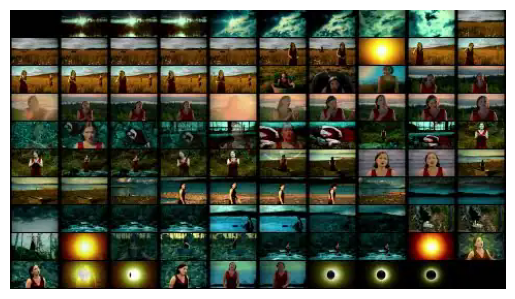

End of video or error in reading.
Video tensor shape: (1, 270, 480, 3)
Video successfully processed into a NumPy tensor.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp  # Required for extracting the video stream URL

def fetch_youtube_video_url(youtube_url):
    """Use yt-dlp to extract the video stream URL from YouTube."""
    ydl_opts = {'format': 'best'}  # You can customize the format
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        result = ydl.extract_info(youtube_url, download=False)
        video_url = result['formats'][0]['url']  # Get the best available video URL
        return video_url

def process_video_from_url(video_url):
    """Process a video stream URL and convert frames into a NumPy tensor."""
    cap = cv2.VideoCapture(video_url)

    if not cap.isOpened():
        print("Error: Unable to open the video stream.")
        return None

    frame_list = []
    print("Processing video... Press 'q' to stop early.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or error in reading.")
            break

        # Convert the frame to a NumPy array and append it to the list
        tensor_frame = np.array(frame)
        frame_list.append(tensor_frame)

        # Display the current frame using matplotlib
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axis
        plt.show()

        # Stop if 'q' is pressed
        # Note: We cannot capture key presses in this mode
        # If you want to stop the video early, you need another way to interrupt.

    cap.release()

    # Convert the list of frames into a 4D NumPy tensor
    video_tensor = np.array(frame_list)
    print(f"Video tensor shape: {video_tensor.shape}")
    return video_tensor

if __name__ == "__main__":
    youtube_url = "https://youtu.be/UGfKMV5AbMI?si=iVvFUTdCyZ6Rokte"  # Replace with your YouTube video URL
    video_url = fetch_youtube_video_url(youtube_url)
    if video_url:
        video_tensor = process_video_from_url(video_url)
        if video_tensor is not None:
            print("Video successfully processed into a NumPy tensor.")
        else:
            print("Failed to process the video.")
    else:
        print("Failed to fetch the video URL.")
